In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [6]:
# Load your stock data
file_path = r'D:\Financial_analysis\Data\CSV\NABIL.csv'
stock_data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and sort the data
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%m/%d/%Y')
stock_data = stock_data.sort_values('Date')
stock_data['Date']

2899   2011-03-20
2898   2011-03-24
2897   2011-03-25
2896   2011-03-27
2895   2011-03-28
          ...    
4      2023-12-10
3      2023-12-11
2      2023-12-12
1      2023-12-13
0      2023-12-14
Name: Date, Length: 2900, dtype: datetime64[ns]

In [4]:
# Remove commas from numeric columns and convert to float
numeric_columns = ['Ltp', 'High', 'Low', 'Open']
stock_data[numeric_columns] = stock_data[numeric_columns].replace(',', '', regex=True).astype(float)


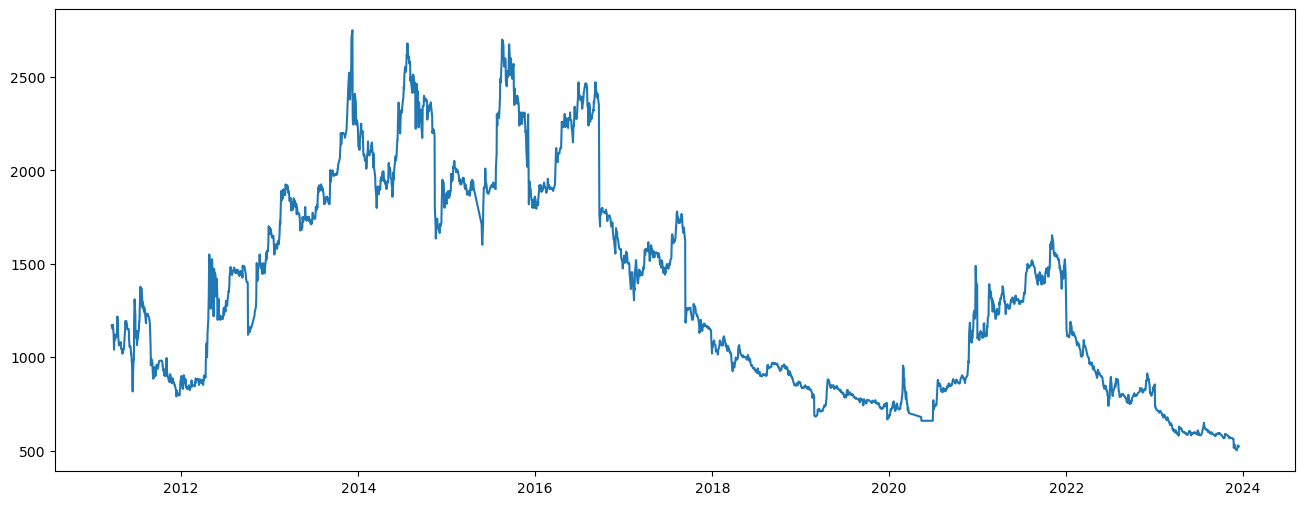

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(stock_data['Date'],stock_data['Ltp'])
plt.show()

In [4]:
# Extract relevant features
data = stock_data[['Ltp', 'High', 'Low', 'Open']]


In [5]:
# Convert the dataframe to a numpy array
dataset = data.values

In [6]:
dataset

array([[1170. , 1190. , 1160. , 1200. ],
       [1153. , 1178. , 1150. , 1162. ],
       [1174. , 1174. , 1145. , 1153. ],
       ...,
       [ 521.2,  528. ,  520. ,  528. ],
       [ 521. ,  530. ,  520. ,  530. ],
       [ 522.8,  527.9,  521. ,  525. ]])

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape the array to have four features/columns
dataset_reshaped = dataset.reshape(-1, 4)

# Scale the data
scaled_data = scaler.fit_transform(dataset_reshaped)
scaled_data

array([[0.29715302, 0.29725011, 0.30063579, 0.31593159],
       [0.28959075, 0.29201222, 0.29609446, 0.29882988],
       [0.29893238, 0.29026626, 0.2938238 , 0.29477948],
       ...,
       [0.00854093, 0.00829332, 0.00999092, 0.01350135],
       [0.00845196, 0.0091663 , 0.00999092, 0.01440144],
       [0.00925267, 0.00824967, 0.01044505, 0.01215122]])

In [8]:
#Only for checking the data that are mormalize to see if the data is return to original data
# Perform inverse transformation
original_data = scaler.inverse_transform(scaled_data)

# Print the shape of the original data
print("Original Data Shape:", original_data.shape)
print(original_data)

Original Data Shape: (2900, 4)
[[1170.  1190.  1160.  1200. ]
 [1153.  1178.  1150.  1162. ]
 [1174.  1174.  1145.  1153. ]
 ...
 [ 521.2  528.   520.   528. ]
 [ 521.   530.   520.   530. ]
 [ 522.8  527.9  521.   525. ]]


In [9]:
# Prepare the training data
training_data_len = int(np.ceil(len(scaled_data) * 0.95))
train_data = scaled_data[0:int(training_data_len), :]

x_train, y_train = [], []


In [10]:

# for i in range(60, len(train_data)):
#     x_train.append(train_data[i - 60:i, :])
#     y_train.append(train_data[i, 0])  # Assuming you want to predict the 'Ltp' feature
#     if i <= 61:
#         print(x_train)
#         print(y_train)
#         print()
# Modify the loop to ensure correct dimensions for x_train and y_train
for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, :])
    y_train.append(train_data[i, 0])  # Assuming you want to predict the 'Ltp' feature


In [11]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# # Reshape the data
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 4))

 # Reshape the data
# Check if x_train is not empty before reshaping
if x_train.shape[0] > 0:
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 4))
    print("Reshape successful!")
else:
    print("x_train is empty. Check the loop for appending values.")

Reshape successful!


In [13]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 4)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [35]:
# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
270/270 [==============================] - 23s 84ms/step - loss: 4.2564e-04
Epoch 2/100
270/270 [==============================] - 23s 85ms/step - loss: 3.7206e-04
Epoch 3/100
270/270 [==============================] - 24s 90ms/step - loss: 5.0968e-04
Epoch 4/100
270/270 [==============================] - 22s 82ms/step - loss: 4.6254e-04
Epoch 5/100
270/270 [==============================] - 34s 125ms/step - loss: 3.8440e-04
Epoch 6/100
270/270 [==============================] - 26s 97ms/step - loss: 3.7165e-04
Epoch 7/100
270/270 [==============================] - 22s 83ms/step - loss: 4.5799e-04
Epoch 8/100
270/270 [==============================] - 23s 85ms/step - loss: 3.6283e-04
Epoch 9/100
270/270 [==============================] - 27s 99ms/step - loss: 3.9771e-04
Epoch 10/100
270/270 [==============================] - 32s 120ms/step - loss: 3.5911e-04
Epoch 11/100
270/270 [==============================] - 50s 187ms/step - loss: 3.9995e-04
Epoch 12/100
270/270 [=====

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



270/270 [==============================] - 26s 96ms/step - loss: 3.3549e-04
Epoch 98/100
270/270 [==============================] - 25s 92ms/step - loss: 2.9528e-04


In [36]:
# Prepare the testing data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, 0]  # Assuming you want to predict the 'Ltp' feature

for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, :])


In [37]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [38]:
# x_test

In [39]:

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 4))

In [40]:
# Assuming the model has been trained and you have the x_test data
# Generate predictions on the test data
predictions = model.predict(x_test)

# predictions = scaler.inverse_transform(predictions)  # Inverse transform to get original scale

# # Reshape predictions to match the original data shape
predictions = predictions.reshape(-1, 1)

# # Repeat the column to match the original data shape
predictions = np.repeat(predictions, 4, axis=1)

# # Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)


5/5 [==============================] - 1s 80ms/step


In [42]:
predictions

array([[601.52856, 610.4324 , 595.4919 , 596.37744],
       [599.3445 , 608.20654, 593.3526 , 594.2186 ],
       [594.6627 , 603.4352 , 588.7666 , 589.591  ],
       [598.729  , 607.5792 , 592.7497 , 593.6102 ],
       [595.1595 , 603.94147, 589.2532 , 590.08203],
       [595.917  , 604.71344, 589.9952 , 590.83075],
       [592.60034, 601.3333 , 586.74646, 587.5525 ],
       [591.3074 , 600.0156 , 585.4799 , 586.27454],
       [593.07935, 601.82153, 587.2156 , 588.02594],
       [588.4418 , 597.0952 , 582.673  , 583.44196],
       [589.5293 , 598.20355, 583.7382 , 584.51697],
       [583.99304, 592.5614 , 578.31525, 579.04474],
       [585.75714, 594.35925, 580.0433 , 580.7884 ],
       [583.0852 , 591.6362 , 577.42596, 578.14734],
       [589.5306 , 598.2049 , 583.7395 , 584.51825],
       [589.848  , 598.5284 , 584.05035, 584.832  ],
       [596.26483, 605.06793, 590.33594, 591.17456],
       [601.12616, 610.0223 , 595.0978 , 595.9797 ],
       [604.43994, 613.3994 , 598.3437 , 599.2

In [43]:
# # Get the models predicted price values
# predictions = model.predict(x_test)

# # Extract only the 'Ltp' values
# predicted_ltp_values = predictions[:, 0]

# # Reshape for inverse_transform
# predicted_ltp_values = predicted_ltp_values.reshape(-1, 1)

# # Inverse transform the predictions
# predictions = scaler.inverse_transform(np.concatenate([predicted_ltp_values, x_test[:, :, 1:]], axis=2))[:, 0]


In [44]:
predicted_ltp_values = predictions[:, 0]

In [45]:
predicted_ltp_values

array([601.52856, 599.3445 , 594.6627 , 598.729  , 595.1595 , 595.917  ,
       592.60034, 591.3074 , 593.07935, 588.4418 , 589.5293 , 583.99304,
       585.75714, 583.0852 , 589.5306 , 589.848  , 596.26483, 601.12616,
       604.43994, 607.2674 , 602.47876, 588.38794, 582.02155, 587.16534,
       593.95166, 591.50775, 593.6407 , 591.13776, 591.2271 , 593.7434 ,
       595.3677 , 596.5889 , 597.6882 , 596.91364, 597.7209 , 594.2832 ,
       597.129  , 590.1462 , 588.98956, 586.8603 , 585.8519 , 609.98834,
       603.9196 , 598.94073, 588.0996 , 586.62286, 582.42926, 581.64233,
       582.0076 , 582.5572 , 584.47424, 587.0394 , 591.4576 , 598.3193 ,
       610.11975, 610.86816, 618.0586 , 623.9224 , 649.5723 , 636.41284,
       626.16626, 626.0727 , 616.604  , 615.45337, 614.39624, 608.17126,
       612.79913, 612.94104, 612.20593, 613.59546, 597.81384, 604.22253,
       604.2079 , 601.00275, 602.1686 , 595.0945 , 589.74445, 592.47296,
       591.73206, 589.94855, 593.3353 , 597.9572 , 

In [46]:
# Assuming 'predicted_ltp_values' is a list or a NumPy array
# Make sure its length matches the length of the 'valid' DataFrame
predicted_ltp_values = predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid['Predictions'] = predicted_ltp_values



In [47]:
valid

,Symbol,Date,Open,High,Low,Ltp,% Change,Qty,Turnover,Predictions,Relative_Error
144,NABIL,2023-04-27,602.0,605.5,598.0,600.0,-0.66,"54,508.00","32,706,170.20",601.528564,0.008907
143,NABIL,2023-04-30,605.0,605.0,593.0,597.0,-0.50,"54,304.00","32,353,777.00",599.344482,0.008023
142,NABIL,2023-05-02,585.1,608.0,585.1,599.5,0.42,"30,177.00","18,046,957.60",594.662720,0.016665
141,NABIL,2023-05-03,600.0,600.0,595.0,598.5,-0.17,"22,982.00","13,729,373.80",598.729004,0.017373
140,NABIL,2023-05-04,600.0,600.0,595.0,598.9,0.07,"32,806.00","19,612,850.30",595.159485,0.018958
...,...,...,...,...,...,...,...,...,...,...,...
4,NABIL,2023-12-10,516.8,530.0,514.0,528.5,4.12,"5,437.00","2,869,237.70",506.262177,0.055061
3,NABIL,2023-12-11,539.0,539.0,520.0,522.0,-1.23,"71,048.00","37,397,217.90",529.138123,0.025187
2,NABIL,2023-12-12,528.0,528.0,520.0,521.2,-0.15,"61,512.00","32,135,111.40",521.273010,0.010530
1,NABIL,2023-12-13,530.0,530.0,520.0,521.0,-0.04,"62,488.00","32,770,640.30",526.246582,0.007941


C:\Users\M9\AppData\Local\Temp\ipykernel_24424\1061934728.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_ltp_values


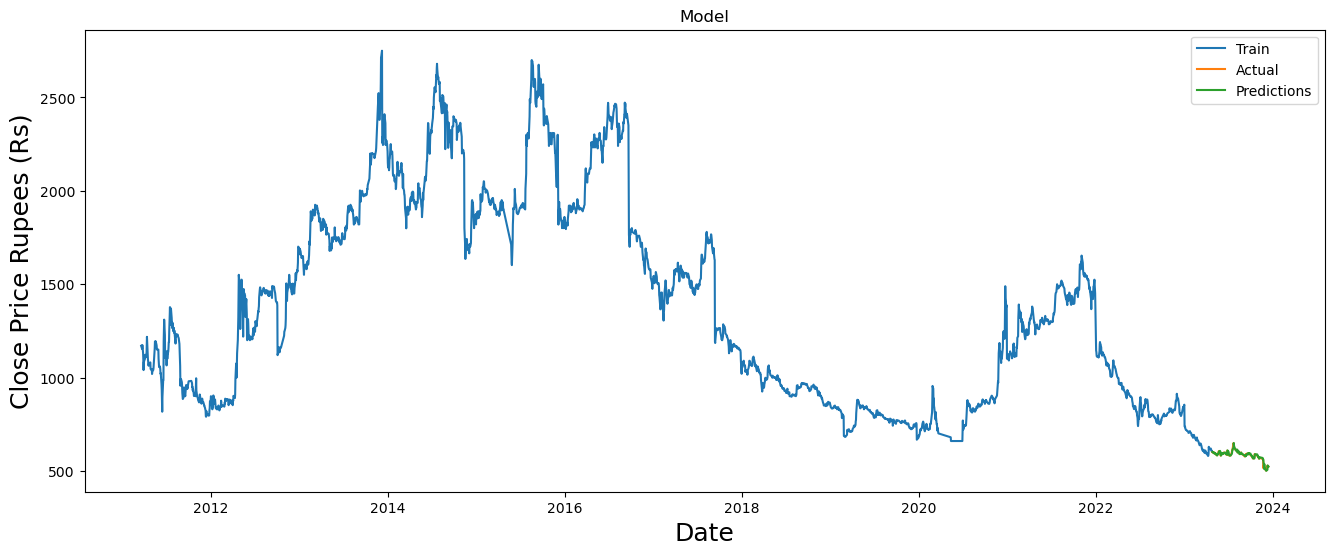

In [48]:
import matplotlib.pyplot as plt

# Assuming train and valid DataFrames are defined earlier

# # Get the dates for the train and validation data
# train_dates = train.index  # Assuming 'Date' is in the index
# valid_dates = valid.index  # Assuming 'Date' is in the index

# Plotting
train = stock_data[:training_data_len]
valid = stock_data[training_data_len:]
predicted_ltp_values = predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid['Predictions'] = predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Ltp'])  # Use 'Ltp' instead of 'Close'
plt.plot(valid['Date'],valid[['Ltp', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')
plt.show()



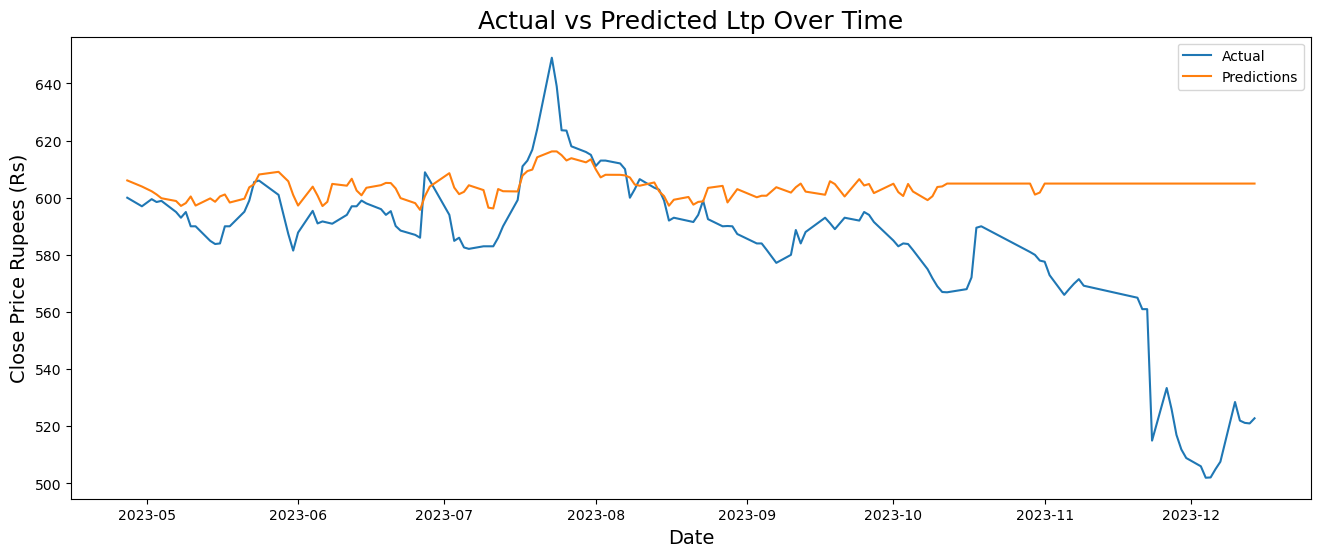

In [83]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Ltp'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')

plt.legend()
plt.show()


In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# # Assuming you have the predictions for the test data
# predicted_ltp_values = model.predict(x_test)
# predicted_ltp_values = scaler.inverse_transform(predicted_ltp_values)  # Inverse transform to get original scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_ltp_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, predicted_ltp_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - predicted_ltp_values) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')



Root Mean Squared Error (RMSE): 7.177305060828234
Mean Absolute Error (MAE): 4.3033421588766165
Mean Absolute Percentage Error (MAPE): 0.7435005189539328%


C:\Users\M9\AppData\Local\Temp\ipykernel_24424\3054827798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Relative_Error'] = (valid['Ltp'] - valid['Predictions']) / valid['Ltp']


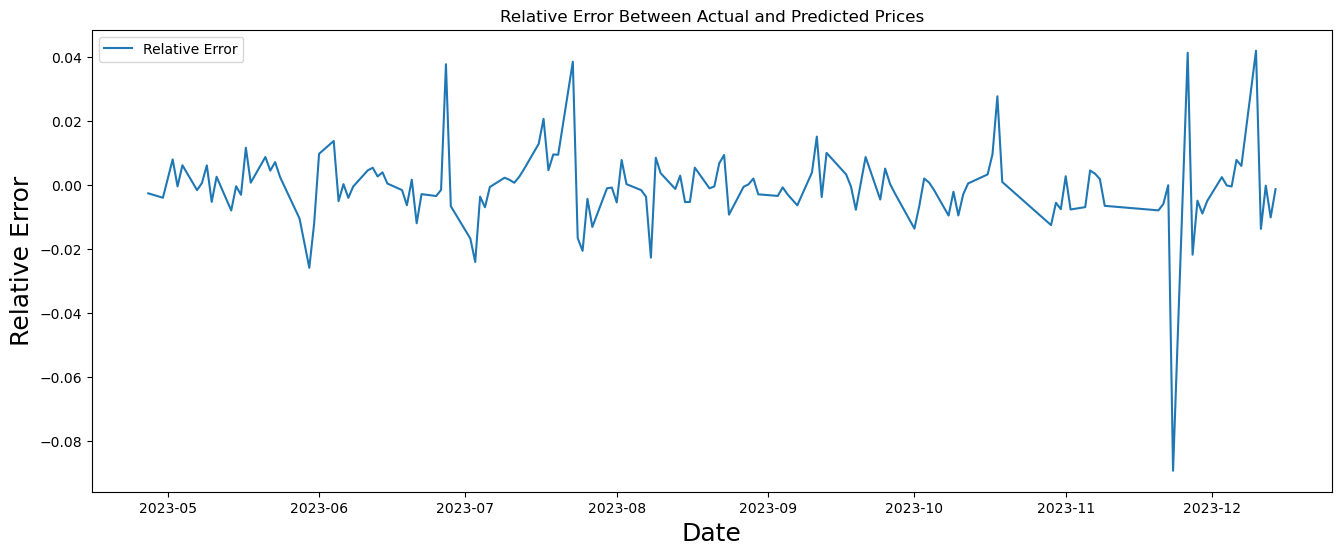

In [51]:
# Calculate relative error
valid['Relative_Error'] = (valid['Ltp'] - valid['Predictions']) / valid['Ltp']

# Sort DataFrame by date
valid = valid.sort_values(by='Date')

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], valid['Relative_Error'], label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()
plt.show()

In [99]:
# Random Forest>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
len(x_train)

2695

In [102]:
# Reshape the training and testing data for Random Forest
x_train_rf = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
x_test_rf = np.reshape(x_test, (x_test.shape[0], x_test.shape[1] * x_test.shape[2]))

In [103]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(x_train_rf, y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [104]:
# Predictions on the test data
rf_predictions = rf_
model.predict(x_test_rf)

rf_predictions = rf_predictions.reshape(-1, 1)

rf_predictions = np.repeat(rf_predictions, 4, axis=1)

rf_predictions = scaler.inverse_transform(rf_predictions)
rf_predictions

NameError: name 'rf_' is not defined

In [105]:
rf_predicted_ltp_values = rf_predictions[:, 0]
rf_predicted_ltp_values

array([606.05 , 603.924, 602.264, 601.15 , 599.818, 598.85 , 597.136,
       598.122, 600.438, 597.258, 599.766, 598.586, 600.454, 601.136,
       598.324, 599.656, 603.65 , 604.722, 608.13 , 609.064, 605.748,
       600.954, 597.264, 603.878, 600.73 , 597.078, 598.574, 604.836,
       604.21 , 606.642, 602.516, 600.846, 603.482, 604.4  , 605.184,
       605.132, 603.25 , 599.86 , 598.104, 595.754, 600.56 , 603.91 ,
       608.592, 603.556, 601.256, 602.062, 604.362, 602.672, 596.52 ,
       596.254, 603.04 , 602.274, 602.194, 607.768, 609.326, 609.842,
       614.164, 616.212, 616.21 , 614.904, 613.042, 613.826, 612.384,
       613.442, 609.944, 607.122, 608.03 , 608.01 , 607.816, 607.08 ,
       604.596, 604.2  , 605.346, 602.204, 600.556, 597.214, 599.294,
       600.258, 597.574, 598.54 , 598.714, 603.442, 604.148, 598.344,
       600.672, 603.002, 600.16 , 600.7  , 600.7  , 603.674, 601.798,
       603.674, 604.954, 602.14 , 601.04 , 605.772, 604.78 , 600.438,
       606.504, 604.

In [106]:
rf_predicted_ltp_values = rf_predicted_ltp_values[:len(valid)]

In [107]:

# Add the 'Predictions' column to the 'valid' DataFrame
valid['Predictions'] = rf_predicted_ltp_values


C:\Users\M9\AppData\Local\Temp\ipykernel_24424\143999704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = rf_predicted_ltp_values


In [108]:
valid

,Symbol,Date,Open,High,Low,Ltp,% Change,Qty,Turnover,Predictions
144,NABIL,2023-04-27,602.0,605.5,598.0,600.0,-0.66,"54,508.00","32,706,170.20",606.050
143,NABIL,2023-04-30,605.0,605.0,593.0,597.0,-0.50,"54,304.00","32,353,777.00",603.924
142,NABIL,2023-05-02,585.1,608.0,585.1,599.5,0.42,"30,177.00","18,046,957.60",602.264
141,NABIL,2023-05-03,600.0,600.0,595.0,598.5,-0.17,"22,982.00","13,729,373.80",601.150
140,NABIL,2023-05-04,600.0,600.0,595.0,598.9,0.07,"32,806.00","19,612,850.30",599.818
...,...,...,...,...,...,...,...,...,...,...
4,NABIL,2023-12-10,516.8,530.0,514.0,528.5,4.12,"5,437.00","2,869,237.70",604.954
3,NABIL,2023-12-11,539.0,539.0,520.0,522.0,-1.23,"71,048.00","37,397,217.90",604.954
2,NABIL,2023-12-12,528.0,528.0,520.0,521.2,-0.15,"61,512.00","32,135,111.40",604.954
1,NABIL,2023-12-13,530.0,530.0,520.0,521.0,-0.04,"62,488.00","32,770,640.30",604.954


C:\Users\M9\AppData\Local\Temp\ipykernel_24424\4087492486.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = rf_predicted_ltp_values


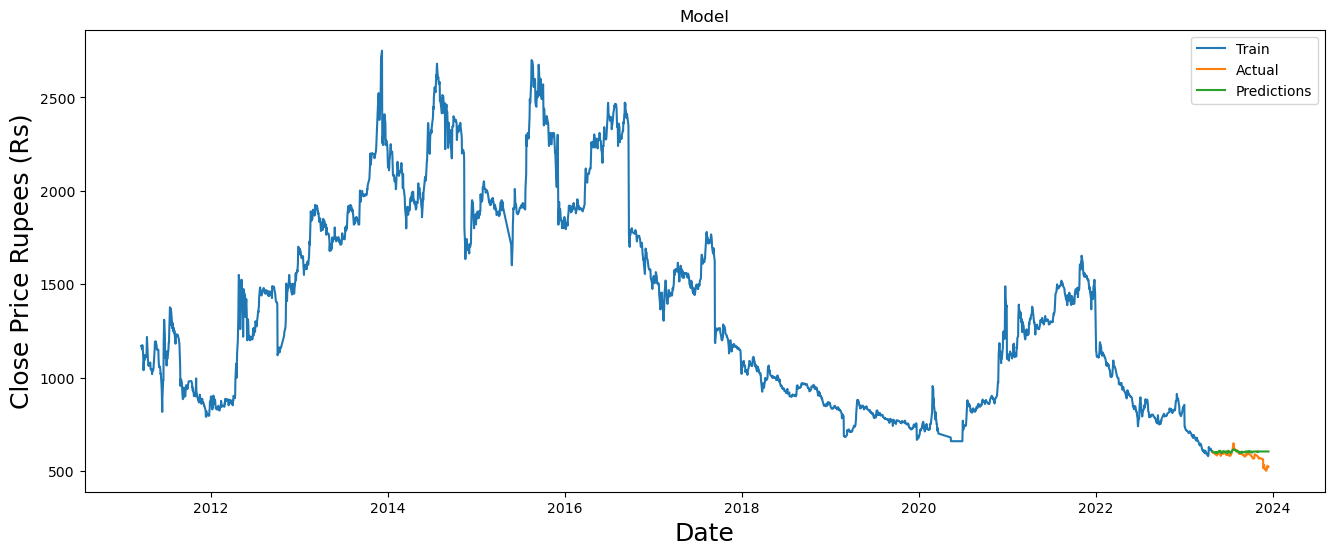

In [109]:

import matplotlib.pyplot as plt

# Plotting
train = stock_data[:training_data_len]
valid = stock_data[training_data_len:]
rf_predicted_ltp_values = rf_predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid['Predictions'] = rf_predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Ltp'])  # Use 'Ltp' instead of 'Close'
plt.plot(valid['Date'],valid[['Ltp', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')
plt.show()


C:\Users\M9\AppData\Local\Temp\ipykernel_24424\1206337180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = pd.to_datetime(valid['Date'])


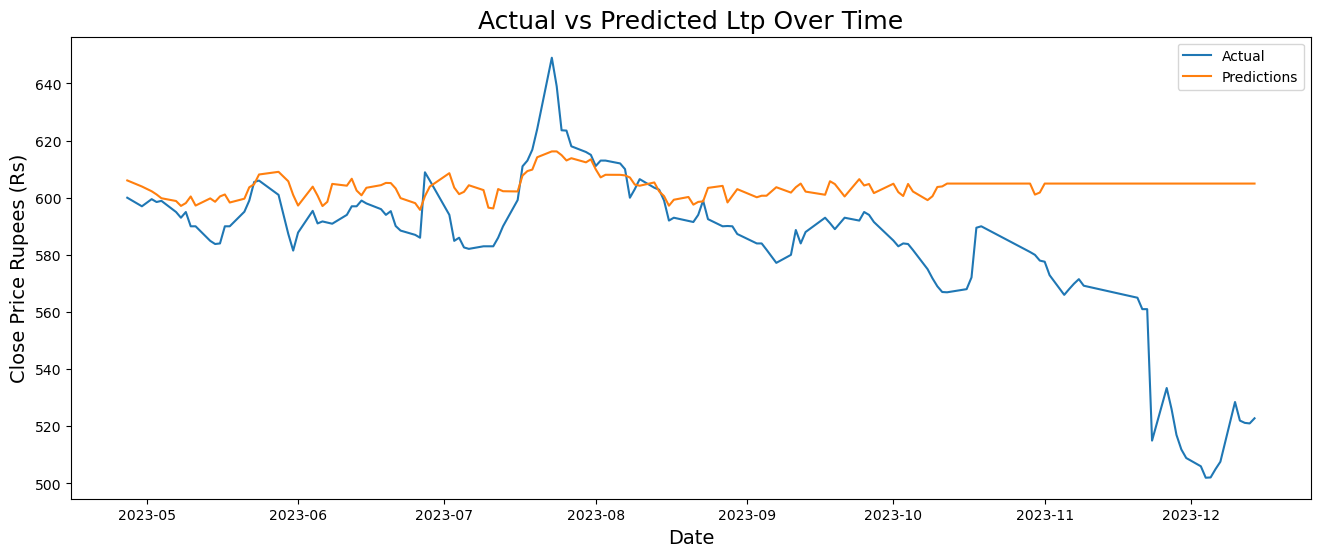

In [110]:

import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Ltp'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')

plt.legend()
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# # Assuming you have the predictions for the test data
# predicted_ltp_values = model.predict(x_test)
# predicted_ltp_values = scaler.inverse_transform(predicted_ltp_values)  # Inverse transform to get original scale

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, rf_predicted_ltp_values))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAE
mae = mean_absolute_error(y_test, rf_predicted_ltp_values)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test - rf_predicted_ltp_values) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Root Mean Squared Error (RMSE): 34.06831669495259
Mean Absolute Error (MAE): 22.138344827586224
Mean Absolute Percentage Error (MAPE): 4.019778400274695%


C:\Users\M9\AppData\Local\Temp\ipykernel_24424\3054827798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Relative_Error'] = (valid['Ltp'] - valid['Predictions']) / valid['Ltp']


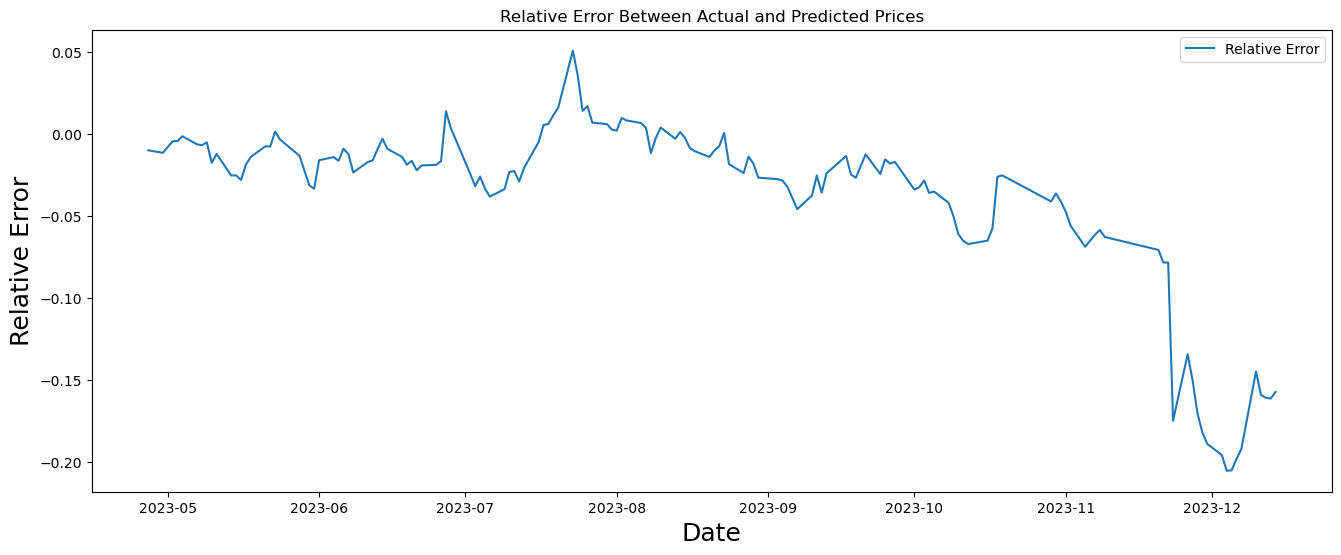

In [112]:
# Calculate relative error
valid['Relative_Error'] = (valid['Ltp'] - valid['Predictions']) / valid['Ltp']

# Sort DataFrame by date
valid = valid.sort_values(by='Date')

# Plotting
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], valid['Relative_Error'], label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()
plt.show()

In [275]:
# SVM>>>>>>>>

In [277]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [278]:

# Extract relevant features
data = stock_data[['Ltp', 'High', 'Low', 'Open']]
target = stock_data['Ltp']  # Replace 'YourTargetColumn' with the actual target column


In [279]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [303]:
y_train


821      729.0
2736     805.0
961      758.0
2647    1474.0
667     1391.0
         ...  
1261     943.0
1804    1919.0
1769    2091.0
1605    1570.0
2039    1855.0
Name: Ltp, Length: 2320, dtype: float64

In [306]:

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

# x_test_scaled

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_train_scaled
# # Create MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))

# # Reshape the array to have four features/columns
# dataset_reshaped = dataset.reshape(-1, 4)

# # Scale the data
# scaled_data = scaler.fit_transform(dataset_reshaped)

# scaled_data

array([0.10234445, 0.13660956, 0.1154193 , ..., 0.71641118, 0.48151488,
       0.61000902])

In [325]:

# Create and train the Support Vector Machine (SVM) model
svm_model = SVR(kernel='linear')  # You can choose different kernels such as 'linear', 'rbf', etc.
svm_model.fit(x_train_scaled, y_train_scaled)


SVR(kernel='linear')

In [326]:

# Make predictions on the test set
svm_predictions = svm_model.predict(x_test_scaled)

svm_predictions = svm_predictions.reshape(-1, 1)

svm_predictions = np.repeat(svm_predictions, 4, axis=1)

svm_predictions = scaler.inverse_transform(svm_predictions)
svm_predictions

array([[1017.91459854, 1017.91459854, 1017.91459854, 1017.91459854],
       [1176.08321   , 1176.08321   , 1176.08321   , 1176.08321   ],
       [1727.09645923, 1727.09645923, 1727.09645923, 1727.09645923],
       ...,
       [1257.48185993, 1257.48185993, 1257.48185993, 1257.48185993],
       [1128.02761729, 1128.02761729, 1128.02761729, 1128.02761729],
       [1060.1737141 , 1060.1737141 , 1060.1737141 , 1060.1737141 ]])

In [327]:
svm_predicted_ltp_values = svm_predictions[:, 0]
# svm_predicted_ltp_values


array([1017.91459854, 1176.08321   , 1727.09645923, 1073.35419694,
       1297.0577818 , 1732.59435366, 2013.98221018,  848.42101429,
       1810.78184547,  896.96354007, 1861.31400655, 1844.17792274,
       2179.3467576 , 1868.25006357, 1120.97753504, 2119.54719936,
       1829.33052282,  768.8786898 , 1484.24797704,  943.80882416,
       1124.06744639, 2171.71048333, 1531.24162761, 2369.90727372,
       1658.34336532, 1339.68915143, 1822.83126273, 1759.70144457,
        899.5506518 , 1126.70186212,  872.58746733, 1043.54187337,
       1214.43669624, 1122.2234516 , 2168.30567112, 1058.78388292,
       1616.38067622, 1562.03438568,  847.60035322, 1841.2248153 ,
       1583.99132564, 1144.21043941, 1174.46858718,  986.0661455 ,
       1001.17821539, 1073.59717141,  867.59754671, 2154.56947744,
        792.08938186, 1207.46073793,  919.71497951, 1175.52094774,
       1231.8095078 ,  988.96996771, 1072.19639035, 1448.17962801,
       1112.5636591 , 1714.17910452, 2235.07965348, 1073.59717

In [328]:
svm_predicted_ltp_values = svm_predicted_ltp_values[:len(valid)]
# Add the 'Predictions' column to the 'valid' DataFrame
valid['Predictions'] = svm_predicted_ltp_values

C:\Users\M9\AppData\Local\Temp\ipykernel_15340\1864721601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = svm_predicted_ltp_values


In [329]:
valid

,Symbol,Date,Open,High,Low,Ltp,% Change,Qty,Turnover,Predictions
144,NABIL,2023-04-27,602.0,605.5,598.0,600.0,-0.66,"54,508.00","32,706,170.20",1017.914599
143,NABIL,2023-04-30,605.0,605.0,593.0,597.0,-0.50,"54,304.00","32,353,777.00",1176.083210
142,NABIL,2023-05-02,585.1,608.0,585.1,599.5,0.42,"30,177.00","18,046,957.60",1727.096459
141,NABIL,2023-05-03,600.0,600.0,595.0,598.5,-0.17,"22,982.00","13,729,373.80",1073.354197
140,NABIL,2023-05-04,600.0,600.0,595.0,598.9,0.07,"32,806.00","19,612,850.30",1297.057782
...,...,...,...,...,...,...,...,...,...,...
4,NABIL,2023-12-10,516.8,530.0,514.0,528.5,4.12,"5,437.00","2,869,237.70",930.295651
3,NABIL,2023-12-11,539.0,539.0,520.0,522.0,-1.23,"71,048.00","37,397,217.90",1095.945075
2,NABIL,2023-12-12,528.0,528.0,520.0,521.2,-0.15,"61,512.00","32,135,111.40",914.194946
1,NABIL,2023-12-13,530.0,530.0,520.0,521.0,-0.04,"62,488.00","32,770,640.30",916.332654


C:\Users\M9\AppData\Local\Temp\ipykernel_15340\4138829671.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = svm_predicted_ltp_values


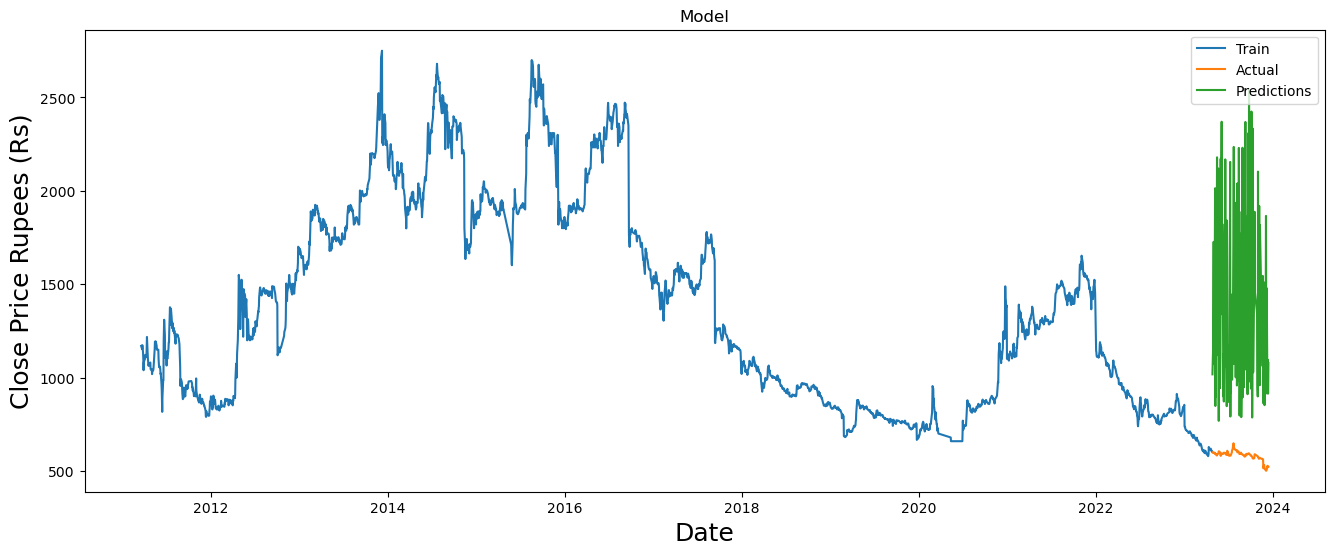

In [330]:
# Plotting
train = stock_data[:training_data_len]
valid = stock_data[training_data_len:]
svm_predicted_ltp_values = svm_predicted_ltp_values[:len(valid)]

# Add the 'Predictions' column to the 'valid' DataFrame
valid['Predictions'] = svm_predicted_ltp_values

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Rupees (Rs)', fontsize=18)
plt.plot(train['Date'],train['Ltp'])  # Use 'Ltp' instead of 'Close'
plt.plot(valid['Date'],valid[['Ltp', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='upper right')
plt.show()

C:\Users\M9\AppData\Local\Temp\ipykernel_15340\1206337180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Date'] = pd.to_datetime(valid['Date'])


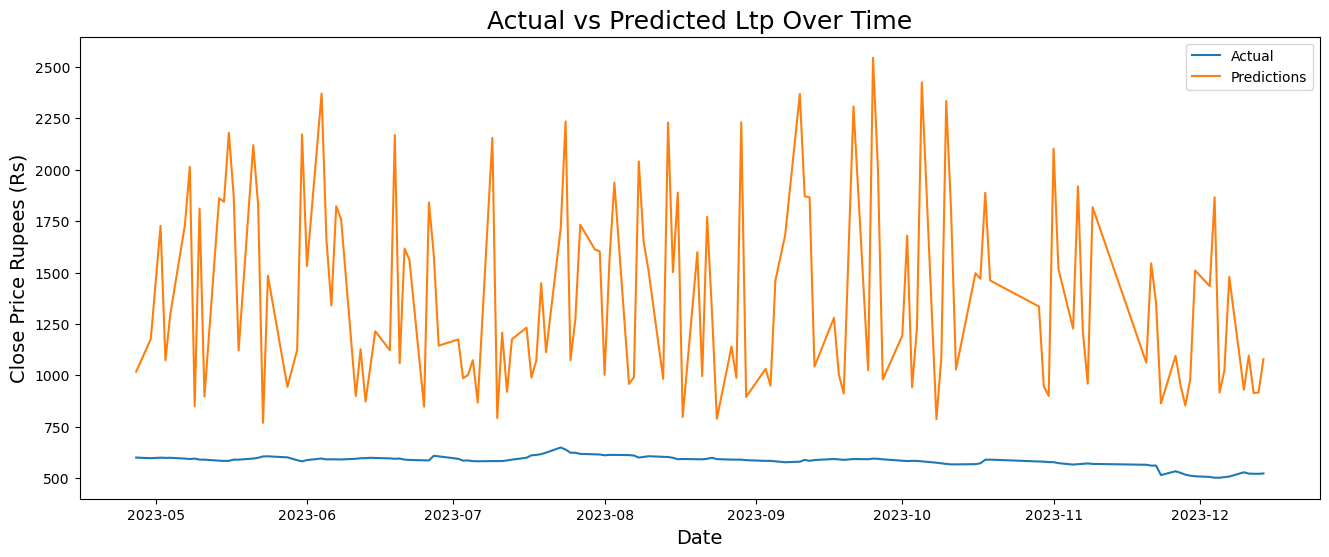

In [331]:

import matplotlib.pyplot as plt

# Convert 'Date' column to datetime format (if not already)
valid['Date'] = pd.to_datetime(valid['Date'])

# Plotting
plt.figure(figsize=(16, 6))
plt.title('Actual vs Predicted Ltp Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price Rupees (Rs)', fontsize=14)

# Plot actual Ltp values
plt.plot(valid['Date'], valid['Ltp'], label='Actual')
         # , marker='o', linestyle='-')

# Plot predicted Ltp values
plt.plot(valid['Date'], valid['Predictions'], label='Predictions')
         # , marker='x', linestyle='--')

plt.legend()
plt.show()

In [332]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# ...

# Calculate metrics for SVM
svm_rmse = np.sqrt(mean_squared_error(valid['Ltp'], valid['Predictions']))
svm_mae = mean_absolute_error(valid['Ltp'], valid['Predictions'])

# Convert Pandas Series to NumPy arrays before using flatten()
valid_ltp_np = valid['Ltp'].values
predictions_np = valid['Predictions'].values.flatten()

# Calculate MAPE
svm_mape = np.mean(np.abs((valid_ltp_np, predictions_np) / valid_ltp_np)) * 100

# Print SVM metrics
print(f"SVM Root Mean Squared Error (RMSE): {svm_rmse}")
print(f"SVM Mean Absolute Error (MAE): {svm_mae}")
print(f"SVM Mean Absolute Percentage Error (MAPE): {svm_mape}")


SVM Root Mean Squared Error (RMSE): 922.9969959537135
SVM Mean Absolute Error (MAE): 807.2636830146712
SVM Mean Absolute Percentage Error (MAPE): 169.12665883382746


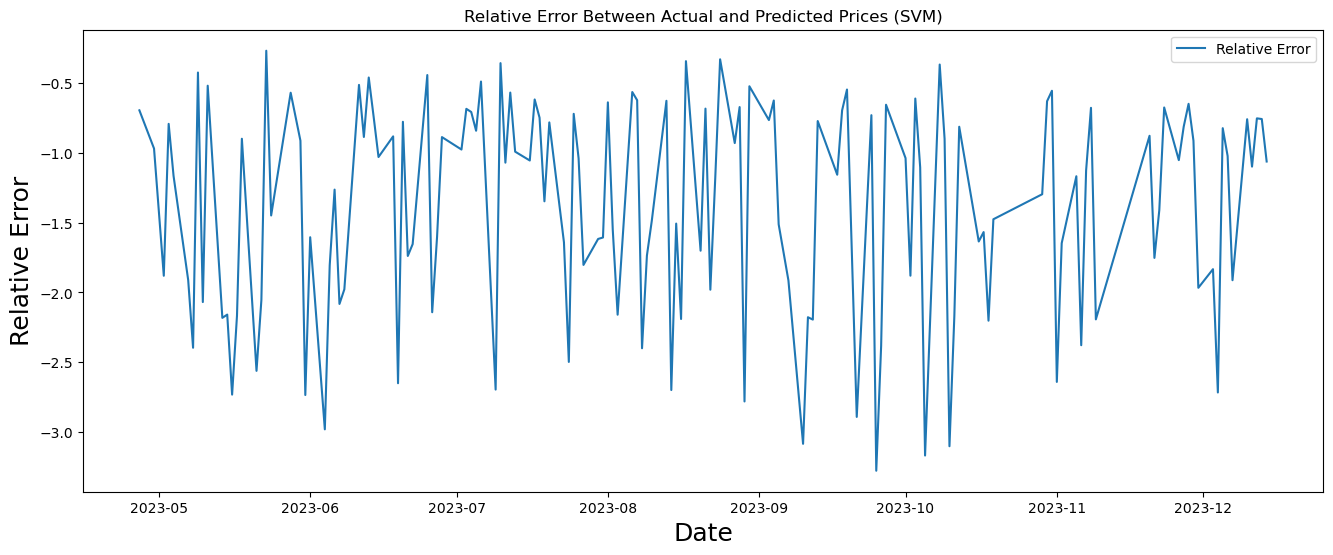

In [333]:
# Calculate Relative Error
relative_error = (valid_ltp_np - predictions_np) / valid_ltp_np
# Plotting Relative Error
plt.figure(figsize=(16, 6))
plt.plot(valid['Date'], relative_error, label='Relative Error')
plt.title('Relative Error Between Actual and Predicted Prices (SVM)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Relative Error', fontsize=18)
plt.legend()
plt.show()